# Gaussian model with latent mean

In [1]:
import numpy as np
import scipy as sp
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(0)

In [8]:
# Ignore this cell, we are just defining a plotting function

def plot_pdf(data, mu_prior=None, sigma2_prior=None, mu_post=None, sigma2_post=None):
    
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(111)
    
    ax.plot(data, np.zeros_like(data), 'x', markersize=12, label='observations')
    mu_ML = np.mean(data)
    ax.plot(mu_ML, 0, 'og', fillstyle='none', markersize=12, label='ML estimate')
    
    mu_max = max(5*np.sqrt(sigma2_prior), np.abs(mu_ML))*1.1
    mu = np.linspace(-mu_max, mu_max, 500)
    
    if mu_prior is not None and sigma2_prior is not None:
        
        ax.plot(mu, norm.pdf(mu, mu_prior, sigma2_prior), 'b-', lw=2, alpha=1, label='prior')
    
    if mu_post is not None and sigma2_post is not None:
                
        ax.plot(mu, norm.pdf(mu, mu_post, sigma2_post), 'r-', lw=2, alpha=1, label='posterior')
    
    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles[::-1], labels[::-1], fontsize=14)

    plt.xlabel('$\mu$', fontsize=15)
    plt.ylabel('pdf', fontsize=15)

Let's first generate some synthetic Gaussian data. 

Note that for real-world problems we have no clue about the true underlying distribution of the observed data. For instance, if your dataset is made of natural images of 1M pixels, the dimension of your data $10^6$ and they are very likely to follow a distribution which is much more complex than a Gaussian in dimension $10^6$.

Anyway, we have to assume a model distribution, whcih may be Gaussian, this is the likelihood!

In [3]:
mu = 0.8 # mean of the true data distribution
sigma2 = 0.1 # variance of the true data distribution

N = 1 # number of observations

data = mu + np.sqrt(sigma2)*np.random.randn(N) 

The above variance is supposed to be known, while the mean is considered as a latent random variable, equipped with a Gaussian prior whose parameters are defined in the following cell.

In [4]:
mu_0 = 0
sigma2_0 = 0.1

We can plot the prior, the observations and the ML estimate of the mean.

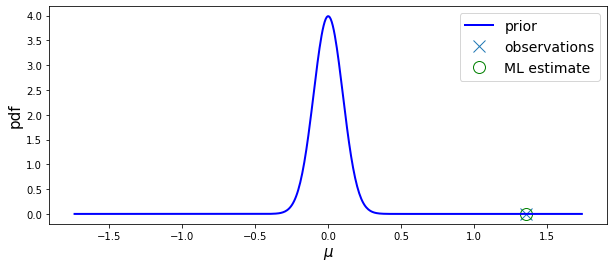

In [5]:
plot_pdf(data, mu_prior=mu_0, sigma2_prior=sigma2_0)

With N=1, the ML estimate is equal to the single observed point and is pretty far from the true value of mean, which was 0.8.

**Exercise 1**

1. Derive the analytical expression of the posterior distribution of the mean (cf. course slides)
2. Complete the following cell to compute the parameters of the posterior (mean and variance)

true mean: 0.80 - ML estimate: 1.36 - MAP estimate: 0.68


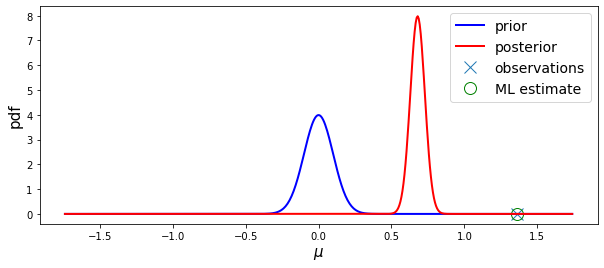

In [6]:
# ML estimate
mu_ML = np.mean(data)

# posterior
mu_post = sigma2/(N*sigma2_0 + sigma2)*mu_0 + N*sigma2_0/(N*sigma2_0 + sigma2)*mu_ML
sigma2_post = 1/(1/sigma2_0 + N/sigma2)

print("true mean: %.2f - ML estimate: %.2f - MAP estimate: %.2f" % (mu, mu_ML, mu_post))

plot_pdf(data, mu_prior=mu_0, sigma2_prior=sigma2_0, mu_post=mu_post, sigma2_post=sigma2_post)

Still with N=1, you should observe that the posterior mean of the mean (hum...), which is also the maximum a posteriori (MAP), is closer to the true value than the ML estimate:

**Exercise 2**

1. How does the posterior mean and variance vary if the number of observations N increases (N = 5, 10, 100)?

2. What happens to the posterior (mean and variance) if you set a high value for the variance of the prior (e.g. $\sigma_0^2 = 5$ and N=1)?
